Part Two - Comparing mRNA transcripts & protein isoforms of Human Cadherin-7 and inter-
pretting the consequences of alternate transcription (25 marks)*

- Task 1 - Perform pairwise sequence comparison between the longest and shortest human
Cadherin-7 alternate transcript sequences. Report your alignment results and explain what
you think they show (3 marks)

- Task 2 - Perform pairwise sequence comparison between the longest and shortest human
Cadherin-7 protein isoform sequences. Report your alignment results and explain what you
think they show (3 marks)

- Task 3 - How many exons does the human Cadherin-7 gene have and what are their lengths
(3 marks)

- Task 4 - Which exon(s) are missing from the shortest Cadherin-7 transcript compared to the
longest one? (2 marks)

- Task 5 - What difference do the missing parts of the protein from the shortest Cadherin-7
isoform compared to the longest make? (HINT you need to find out what the missing pieces
do) (4 marks)

up to 6 marks for including one additional piece of analysis.
up to 4 marks for exceptionally well organised and executed approach.

Possible extensions here might be to:
describe the the protein domains of Cadherin-7 relate the changes in sequence between the shortest and longest isoforms to their protein
structures, what’s different?
in addition to describing the difference the missing protein sequence makes also explain why
it makes the difference (HINT - look up single pass transmembrane proteins).

In [16]:
from Bio import Entrez
from Bio import SeqIO
from Bio import pairwise2 as pw
from Bio import AlignIO
from Bio import Align as al

Entrez.email = "s2055618@ed.ac.uk"

# task 1

In [17]:
# Task 1
# longest transcript = NM_001362438.2
# shortest transcript = NM_001317214.3

# What does this alignment mean?? Gonna use a website as this doesn't really mean anythign to me...

transcript_ids = ["NM_001362438.2", "NM_001317214.3"]

handle = Entrez.efetch(db="nucleotide", id=transcript_ids, rettype='fasta',retmode="text")
records = list(SeqIO.parse(handle, "fasta"))
handle.close()

print(records)

# use these as sequence objects
seq1 = records[0].seq
seq2 = records[1].seq

print(seq1)
print(seq2)
print("\n")

# perform a pairwise global alignment using the pam250 substitution matrix
mx = al.substitution_matrices.load('PAM250')

alignments = pw.align.globalds(seq1, seq2, mx, -10, -0.5)

# this tells us how many alignments have the same optimal score (pretty useful, think of cells with more than 
# one backtrace mark in the hand-drawn alignments)
print("number of alignments", len(alignments))

# in the result we can extract several score features

# the alignment score
print("alignment score", alignments[0][2])

# the start of the alignment (NB global alignments must always start at 0)
print("start of the alginment =", alignments[0][3])

# the end of the alignment
print("end of the alingment", alignments[0][4])

alignment_fasta = \
">"+records[0].name+" "+records[0].description+"\n"+alignments[0][0] \
+"\n"+ \
">"+records[1].name+" "+records[1].description+"\n"+alignments[0][1]

"""# write it to a file
fh = open('globin_alignment_pam250_global.fa','w')
fh.write(alignment_fasta)
fh.close()

# read in the file using AlignIO
alignment = AlignIO.read("/globin_alignment_pam250_global.fa", "fasta")

# convert to clustal
print(format(alignment,'clustal'))"""

[SeqRecord(seq=Seq('AGTCTGCCCCGCGCGCGGAGCTGCGCGCACTGGGTCCCCAAGAGCCCGCGGGCG...AAA'), id='NM_001362438.2', name='NM_001362438.2', description='NM_001362438.2 Homo sapiens cadherin 7 (CDH7), transcript variant d, mRNA', dbxrefs=[]), SeqRecord(seq=Seq('AGTCTGCCCCGCGCGCGGAGCTGCGCGCACTGGGTCCCCAAGAGCCCGCGGGCG...TTA'), id='NM_001317214.3', name='NM_001317214.3', description='NM_001317214.3 Homo sapiens cadherin 7 (CDH7), transcript variant c, mRNA', dbxrefs=[])]
AGTCTGCCCCGCGCGCGGAGCTGCGCGCACTGGGTCCCCAAGAGCCCGCGGGCGTCCGGCAGCCGAGCGCACGTTCTTTCGGATGCACACGCCCGGGTCCCTGGCGTCTGACGCCGTGGGGAGGGCAGCGAGGCCCCAGGTGAGTGTGTCTGCCTGCGCGGGGCTGGGGAGGCGCCGCTGGGCAGATGTGCGCCCTTGCTGTGCGCCTTTGGAAGCAGGACTAATCAGTGAGCGGAGAGCGGGCGGGGATGTCCGTGTGGAGTTTCCCTTGGCGTCCCCAAGTTACTGCGTGTTGCAGTGAGATGTGGCTCTGCAAGGCAGGACAGGCTTGTGGACGGAGGCGGGGGCGTTTGGCCCGGAAAGCCGGTGTTGACAGACACCAGGTGCGACACGAGGAGTAGTAGTTGAGGGTAAGAGCAAATCCCGGCACTCTCCAGGTGCAGCGGCAAACATGGGCAGGCTGGAGCACTCTCCTCAAAGAGGACCACAAGCAGGCTCCTCCCTCAACCTCGGACTGATGGGGGCACAACTCCGCGCCGGC

'# write it to a file\nfh = open(\'globin_alignment_pam250_global.fa\',\'w\')\nfh.write(alignment_fasta)\nfh.close()\n\n# read in the file using AlignIO\nalignment = AlignIO.read("/globin_alignment_pam250_global.fa", "fasta")\n\n# convert to clustal\nprint(format(alignment,\'clustal\'))'

In [18]:
# Using pairwise sequence alignment tool found @ https://www.ebi.ac.uk/Tools/psa/
# Specifically using Needle (EMBOSS)

########################################
# Program: needle
# Rundate: Thu 12 Oct 2023 15:01:41
# Commandline: needle
#    -auto
#    -stdout
#    -asequence emboss_needle-I20231012-150137-0193-3160880-p1m.asequence
#    -bsequence emboss_needle-I20231012-150137-0193-3160880-p1m.bsequence
#    -datafile EDNAFULL
#    -gapopen 10.0
#    -gapextend 0.5
#    -endopen 10.0
#    -endextend 0.5
#    -aformat3 pair
#    -snucleotide1
#    -snucleotide2
# Align_format: pair
# Report_file: stdout
########################################

#=======================================
#
# Aligned_sequences: 2
# 1: EMBOSS_001
# 2: EMBOSS_001
# Matrix: EDNAFULL
# Gap_penalty: 10.0
# Extend_penalty: 0.5
#
# Length: 13131
# Identity:    3036/13131 (23.1%)
# Similarity:  3036/13131 (23.1%)
# Gaps:        9917/13131 (75.5%)
# Score: 11838.0
# 
#
#=======================================

# NOTE: COMPLETE ALIGNMENT FROM 1-136, FOLLOWED BY BIG GAP, THEN ALIGNMENT FROM 939-3001 WITH NO BREAKS, THEN LOTS OF LITTLE GAPS AND ALIGNMENTS OF 1-5, UNTIL THE SHORTER TRANSCRIPT 
# JUST ISNT LONG ENOUGH AND THERE ARE NO MORE MATCHES



# task 2

In [24]:
# TASK 2
# written some code to extract the proteins, then performing pairwise sequence alignment on an external website (details about the alignment parameters)


protein_ids = ['NM_004361.5','NM_001317214.3']

for i in range(len(records)):
    handle = Entrez.efetch(db="nucleotide", id=protein_ids[i], rettype="gb", retmode="text")
    record = SeqIO.read(handle, "genbank")
    handle.close()
    
    if record.features:
            for feature in record.features:
                # type=cds == coding sequence
                if feature.type == "CDS":
                    current_sequence = feature.location.extract(record).seq
                    print('ID:', protein_ids[i])
                    current_protein_sequence = current_sequence.translate()
                    print(current_protein_sequence)
                    print("protein sequence length (incl. stop codon):", len(current_protein_sequence), "\n")
                    # this split is kind of not needed as I just need to remove an asterisk at the end of the sequence, just left over from a previous code version

ID: NM_004361.5
MKLGKVEFCHFLQLIALFLCFSGMSQAELSRSRSKPYFQSGRSRTKRSWVWNQFFVLEEYMGSDPLYVGKLHSDVDKGDGSIKYILSGEGASSIFIIDENTGDIHATKRLDREEQAYYTLRAQALDRLTNKPVEPESEFVIKIQDINDNEPKFLDGPYTAGVPEMSPVGTSVVQVTATDADDPTYGNSARVVYSILQGQPYFSVEPKTGVIKTALPNMDREAKDQYLLVIQAKDMVGQNGGLSGTTSVTVTLTDVNDNPPRFPRRSYQYNVPESLPVASVVARIKAADADIGANAEMEYKIVDGDGLGIFKISVDKETQEGIITIQKELDFEAKTSYTLRIEAANKDADPRFLSLGPFSDTTTVKIIVEDVDEPPVFSSPLYPMEVSEATQVGNIIGTVAAHDPDSSNSPVRYSIDRNTDLERYFNIDANSGVITTAKSLDRETNAIHNITVLAMESQNPSQVGRGYVAITILDINDNAPEFAMDYETTVCENAQPGQVIQKISAVDKDEPSNGHQFYFSLTTDATNNHNFSLKDNKDNTASILTRRNGFRRQEQSVYYLPIFIVDSGSPSLSSTNTLTIRVCDCDADGVAQTCNAEAYVLPAGLSTGALIAILACVLTLLVLILLIVTMRRRKKEPLIFDEERDIRENIVRYDDEGGGEEDTEAFDMAALRNLNVIRDTKTRRDVTPEIQFLSRPAFKSIPDNVIFREFIWERLKEADVDPGAPPYDSLQTYAFEGNGSVAESLSSLDSISSNSDQNYDYLSDWGPRFKRLADMYGTGQESLYS*
protein sequence length (incl. stop codon): 786 

ID: NM_001317214.3
MKLGKVEFCHFLQLIALFLCFSGMSQAELSRSRSKPYFQSGRSRTKRSWVWNQFFVLEEYMGSDPLYVGKLHSDVDKGDGSIKYILSGEGASSIFIIDENTGDIHATKRLDREEQAYYTLRAQALDRL

In [ ]:
########################################
# Program: needle
# Rundate: Thu 12 Oct 2023 15:14:36
# Commandline: needle
#    -auto
#    -stdout
#    -asequence emboss_needle-I20231012-151420-0316-83636351-p1m.asequence
#    -bsequence emboss_needle-I20231012-151420-0316-83636351-p1m.bsequence
#    -datafile EBLOSUM62
#    -gapopen 10.0
#    -gapextend 0.5
#    -endopen 10.0
#    -endextend 0.5
#    -aformat3 pair
#    -sprotein1
#    -sprotein2
# Align_format: pair
# Report_file: stdout
########################################

#=======================================
#
# Aligned_sequences: 2
# 1: EMBOSS_001
# 2: EMBOSS_001
# Matrix: EBLOSUM62
# Gap_penalty: 10.0
# Extend_penalty: 0.5
#
# Length: 792
# Identity:     622/792 (78.5%)
# Similarity:   623/792 (78.7%)
# Gaps:         169/792 (21.3%)
# Score: 3179.0
# 
#
#=======================================

# NOTE: THE ONLY BIT THAT WASN'T REALLY ALIGNED WAS WHERE THE PROTEINS DIFFERED IN LENGTH

# EMBOSS_001         1 MKLGKVEFCHFLQLIALFLCFSGMSQAELSRSRSKPYFQSGRSRTKRSWV     50
#                      ||||||||||||||||||||||||||||||||||||||||||||||||||
# EMBOSS_001         1 MKLGKVEFCHFLQLIALFLCFSGMSQAELSRSRSKPYFQSGRSRTKRSWV     50

# EMBOSS_001        51 WNQFFVLEEYMGSDPLYVGKLHSDVDKGDGSIKYILSGEGASSIFIIDEN    100
#                      ||||||||||||||||||||||||||||||||||||||||||||||||||
# EMBOSS_001        51 WNQFFVLEEYMGSDPLYVGKLHSDVDKGDGSIKYILSGEGASSIFIIDEN    100

# EMBOSS_001       101 TGDIHATKRLDREEQAYYTLRAQALDRLTNKPVEPESEFVIKIQDINDNE    150
#                      ||||||||||||||||||||||||||||||||||||||||||||||||||
# EMBOSS_001       101 TGDIHATKRLDREEQAYYTLRAQALDRLTNKPVEPESEFVIKIQDINDNE    150

# EMBOSS_001       151 PKFLDGPYTAGVPEMSPVGTSVVQVTATDADDPTYGNSARVVYSILQGQP    200
#                      ||||||||||||||||||||||||||||||||||||||||||||||||||
# EMBOSS_001       151 PKFLDGPYTAGVPEMSPVGTSVVQVTATDADDPTYGNSARVVYSILQGQP    200

# EMBOSS_001       201 YFSVEPKTGVIKTALPNMDREAKDQYLLVIQAKDMVGQNGGLSGTTSVTV    250
#                      ||||||||||||||||||||||||||||||||||||||||||||||||||
# EMBOSS_001       201 YFSVEPKTGVIKTALPNMDREAKDQYLLVIQAKDMVGQNGGLSGTTSVTV    250

# EMBOSS_001       251 TLTDVNDNPPRFPRRSYQYNVPESLPVASVVARIKAADADIGANAEMEYK    300
#                      ||||||||||||||||||||||||||||||||||||||||||||||||||
# EMBOSS_001       251 TLTDVNDNPPRFPRRSYQYNVPESLPVASVVARIKAADADIGANAEMEYK    300

# EMBOSS_001       301 IVDGDGLGIFKISVDKETQEGIITIQKELDFEAKTSYTLRIEAANKDADP    350
#                      ||||||||||||||||||||||||||||||||||||||||||||||||||
# EMBOSS_001       301 IVDGDGLGIFKISVDKETQEGIITIQKELDFEAKTSYTLRIEAANKDADP    350

# EMBOSS_001       351 RFLSLGPFSDTTTVKIIVEDVDEPPVFSSPLYPMEVSEATQVGNIIGTVA    400
#                      ||||||||||||||||||||||||||||||||||||||||||||||||||
# EMBOSS_001       351 RFLSLGPFSDTTTVKIIVEDVDEPPVFSSPLYPMEVSEATQVGNIIGTVA    400

# EMBOSS_001       401 AHDPDSSNSPVRYSIDRNTDLERYFNIDANSGVITTAKSLDRETNAIHNI    450
#                      ||||||||||||||||||||||||||||||||||||||||||||||||||
# EMBOSS_001       401 AHDPDSSNSPVRYSIDRNTDLERYFNIDANSGVITTAKSLDRETNAIHNI    450

# EMBOSS_001       451 TVLAMESQNPSQVGRGYVAITILDINDNAPEFAMDYETTVCENAQPGQVI    500
#                      ||||||||||||||||||||||||||||||||||||||||||||||||||
# EMBOSS_001       451 TVLAMESQNPSQVGRGYVAITILDINDNAPEFAMDYETTVCENAQPGQVI    500

# EMBOSS_001       501 QKISAVDKDEPSNGHQFYFSLTTDATNNHNFSLKDNKDNTASILTRRNGF    550
#                      ||||||||||||||||||||||||||||||||||||||||||||||||||
# EMBOSS_001       501 QKISAVDKDEPSNGHQFYFSLTTDATNNHNFSLKDNKDNTASILTRRNGF    550

# EMBOSS_001       551 RRQEQSVYYLPIFIVDSGSPSLSSTNTLTIRVCDCDADGVAQTCNAEAYV    600
#                      ||||||||||||||||||||||||||||||||||||||||||||||||||
# EMBOSS_001       551 RRQEQSVYYLPIFIVDSGSPSLSSTNTLTIRVCDCDADGVAQTCNAEAYV    600

# EMBOSS_001       601 LPAGLSTGALIAILACVLTLL-------VLILLIVTMRRRKKEPLIFDEE    643
#                      |||||||||||||||||||||       :|                    
# EMBOSS_001       601 LPAGLSTGALIAILACVLTLLGRYCFQGLL--------------------    630

# EMBOSS_001       644 RDIRENIVRYDDEGGGEEDTEAFDMAALRNLNVIRDTKTRRDVTPEIQFL    693
                                                                       
# EMBOSS_001       631 --------------------------------------------------    630

# EMBOSS_001       694 SRPAFKSIPDNVIFREFIWERLKEADVDPGAPPYDSLQTYAFEGNGSVAE    743
                                                                       
# EMBOSS_001       631 --------------------------------------------------    630

# EMBOSS_001       744 SLSSLDSISSNSDQNYDYLSDWGPRFKRLADMYGTGQESLYS    785
                                                               
# EMBOSS_001       631 ------------------------------------------    630


#---------------------------------------
#---------------------------------------

# task 3 - how many exons does caderin 7 have?
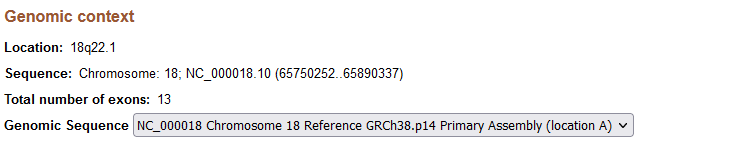

ans = 13

note: viewing the genes is failing on ncbi website, so cant see lengths

method = obtained from ncbi website

# task 4

In [29]:
# longest transcript = NM_001362438.2
# shortest transcript = NM_001317214.3

transcript_ids = ["NM_001362438.2", "NM_001317214.3"]

handle = Entrez.efetch(db="nucleotide", id=transcript_ids[0], rettype="gb", retmode="text")
record = SeqIO.read(handle, "genbank")
handle.close()


print(record)


ID: NM_001362438.2
Name: NM_001362438
Description: Homo sapiens cadherin 7 (CDH7), transcript variant d, mRNA
Number of features: 29
/molecule_type=mRNA
/topology=linear
/data_file_division=PRI
/date=27-DEC-2022
/accessions=['NM_001362438', 'XM_017025523']
/sequence_version=2
/keywords=['RefSeq']
/source=Homo sapiens (human)
/organism=Homo sapiens
/taxonomy=['Eukaryota', 'Metazoa', 'Chordata', 'Craniata', 'Vertebrata', 'Euteleostomi', 'Mammalia', 'Eutheria', 'Euarchontoglires', 'Primates', 'Haplorrhini', 'Catarrhini', 'Hominidae', 'Homo']
/references=[Reference(title='Common variants in the CDH7 gene are associated with major depressive disorder in the Han Chinese population', ...), Reference(title='Association of genome-wide variation with highly sensitive cardiac troponin-T levels in European Americans and Blacks: a meta-analysis from atherosclerosis risk in communities and cardiovascular health studies', ...), Reference(title='A genome-wide association study of chemotherapy-induced 